# Perkenalan Dataset

Dataset ini berisi informasi morfologis berbagai jenis ikan yang diambil dari pasar ikan. Tujuan analisis adalah memprediksi berat ikan (regression task) berdasarkan fitur-fitur seperti panjang, tinggi, dan lebar ikan.
dataset diambil melalui web kaggle data dapat diakses melalui link ini (https://www.kaggle.com/datasets/vipullrathod/fish-market)

# Import Libreries


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer

import os


#Load dataset

In [2]:
# Load dataset
df = pd.read_csv("Fish.csv")

# Tampilkan 5 data awal
df.head()


,Species,Weight,Length1,Length2,Length3,Height,Width
0,Bream,242.0,23.2,25.4,30.0,11.5200,4.0200
1,Bream,290.0,24.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,23.9,26.5,31.1,12.3778,4.6961
3,Bream,363.0,26.3,29.0,33.5,12.7300,4.4555
4,Bream,430.0,26.5,29.0,34.0,12.4440,5.1340


# Exploratory Data Analysis

In [3]:
# Info umum
print(df.info())


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Species  159 non-null    object 
 1   Weight   159 non-null    float64
 2   Length1  159 non-null    float64
 3   Length2  159 non-null    float64
 4   Length3  159 non-null    float64
 5   Height   159 non-null    float64
 6   Width    159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB
None


In [4]:
# Statistik deskriptif
print(df.describe())



            Weight     Length1     Length2     Length3      Height       Width
count   159.000000  159.000000  159.000000  159.000000  159.000000  159.000000
mean    398.326415   26.247170   28.415723   31.227044    8.970994    4.417486
std     357.978317    9.996441   10.716328   11.610246    4.286208    1.685804
min       0.000000    7.500000    8.400000    8.800000    1.728400    1.047600
25%     120.000000   19.050000   21.000000   23.150000    5.944800    3.385650
50%     273.000000   25.200000   27.300000   29.400000    7.786000    4.248500
75%     650.000000   32.700000   35.500000   39.650000   12.365900    5.584500
max    1650.000000   59.000000   63.400000   68.000000   18.957000    8.142000


In [6]:
# Cek missing values
print(df.isnull().sum())



Species    0
Weight     0
Length1    0
Length2    0
Length3    0
Height     0
Width      0
dtype: int64


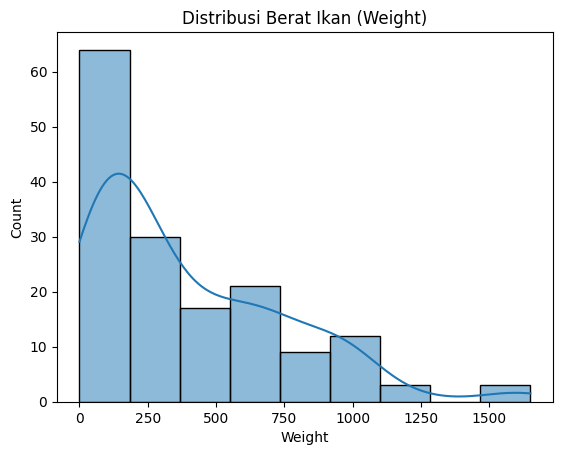

In [7]:
# Visualisasi distribusi target
sns.histplot(df['Weight'], kde=True)
plt.title('Distribusi Berat Ikan (Weight)')
plt.show()



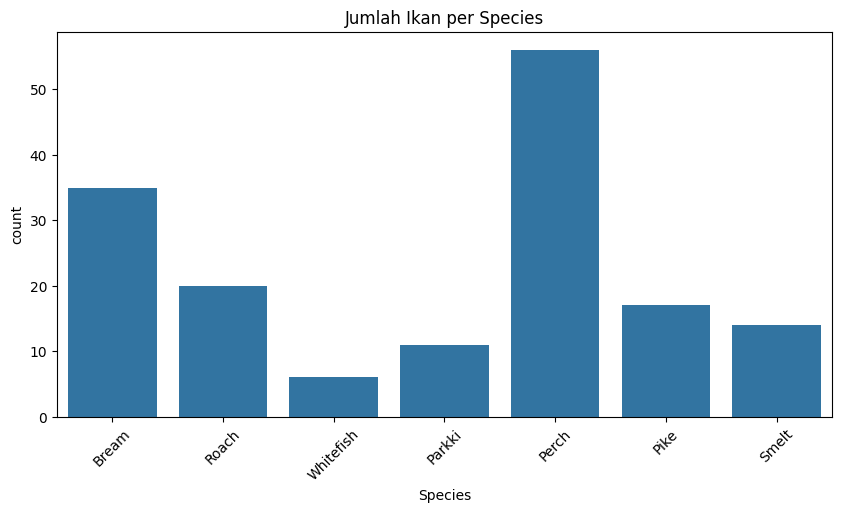

In [9]:
# Distribusi tiap jenis ikan
plt.figure(figsize=(10,5))
sns.countplot(data=df, x='Species')
plt.title('Jumlah Ikan per Species')
plt.xticks(rotation=45)
plt.show()



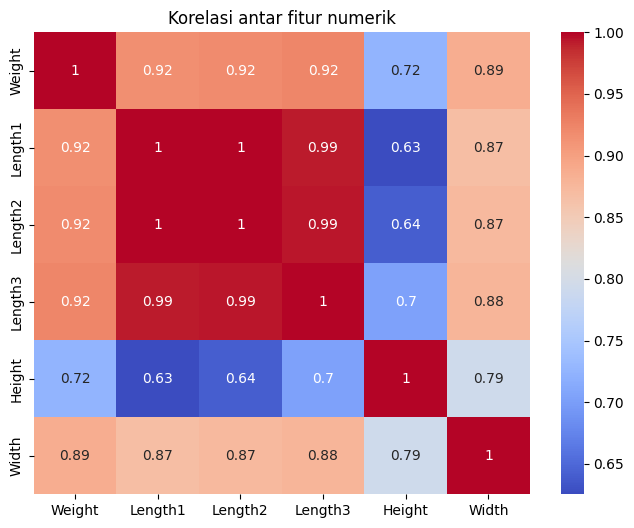

In [10]:
# Korelasi numerik
plt.figure(figsize=(8,6))
sns.heatmap(df.drop(columns='Species').corr(), annot=True, cmap='coolwarm')
plt.title("Korelasi antar fitur numerik")
plt.show()

# Preprocessing


In [11]:
# Definisi fitur
numerical_features = ['Length1', 'Length2', 'Length3', 'Height', 'Width']
categorical_features = ['Species']

# Pipeline untuk preprocessing numerik
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

# Pipeline untuk preprocessing kategorikal
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('encoder', OneHotEncoder(handle_unknown='ignore'))
])

# Gabungkan pipeline
preprocessor = ColumnTransformer(transformers=[
    ('num', numeric_transformer, numerical_features),
    ('cat', categorical_transformer, categorical_features)
])

# Jalankan preprocessing
X = df.drop(columns=['Weight'])
y = df['Weight']

X_preprocessed = preprocessor.fit_transform(X)

# Gabungkan kembali ke DataFrame
ohe_columns = preprocessor.named_transformers_['cat']['encoder'].get_feature_names_out(categorical_features)
processed_columns = np.concatenate([numerical_features, ohe_columns])

X_processed_df = pd.DataFrame(X_preprocessed, columns=processed_columns)

# Tambahkan kembali target
df_final = pd.concat([X_processed_df, y.reset_index(drop=True)], axis=1)

# Simpan hasil
output_path = "preprocessing/namadataset_preprocessing.csv"
os.makedirs("preprocessing", exist_ok=True)
df_final.to_csv(output_path, index=False)

print(f"✅ Dataset hasil preprocessing telah disimpan di: {output_path}")


✅ Dataset hasil preprocessing telah disimpan di: preprocessing/namadataset_preprocessing.csv
